In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **Load Dataset**

In [205]:
df=pd.read_csv("Train (1).csv")

In [206]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [208]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **Data Preprocessing**

In [209]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [210]:
df.shape

(8523, 12)

# **Missing values handling**


In [211]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

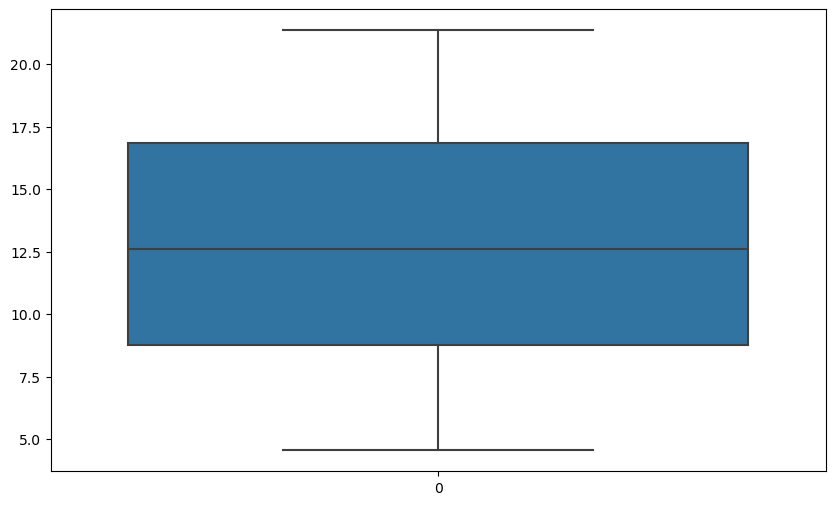

In [212]:
#checking outliers
plt.figure(figsize=(10,6))
sns.boxplot(df['Item_Weight'])

In [213]:
# Impute 'Item_Weight' with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [214]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [215]:
# Impute 'Outlet_Size' with median value
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [216]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [217]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [218]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

# **Feature Engineering**

In [219]:
df['Outlet age']=2013-df['Outlet_Establishment_Year']

In [220]:
df['Outlet age'].value_counts()

Outlet age
28    1463
26     932
14     930
16     930
9      930
11     929
4      928
6      926
15     555
Name: count, dtype: int64

In [221]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [222]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({
    'LF':'Low Fat',
    'low fat':'Low Fat',
    'reg':'Regular'
})

In [223]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [224]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [225]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [226]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [227]:
mean_visibility = df.loc[df['Item_Visibility'] > 0, 'Item_Visibility'].mean()
df['Item_Visibility'] = df['Item_Visibility'].replace(0, mean_visibility)

In [228]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.070482    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [229]:
df['Item_Visibility'].eq(0).sum()

0

In [230]:
mean_visibility

0.07048184085069402

In [231]:
df['item_type_combined']=df['Item_Identifier'].apply(lambda x:x[0:2])

In [232]:
df['item_type_combined']=df['item_type_combined'].map({"FD":"FOOD","NC":"Non-Consumable","DR":"Drinks"})

In [233]:
df['item_type_combined'].value_counts()

item_type_combined
FOOD              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [234]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet age,item_type_combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FOOD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FOOD
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15,FOOD
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


In [235]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [236]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [237]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [238]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [239]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet age                 8523 non-null   int64  
 13  item_type_combined         8523 non-null   objec

In [241]:
df.drop('Item_Identifier',axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet age,item_type_combined
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FOOD
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FOOD
3,19.200,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15,FOOD
4,8.930,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,26,FOOD
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,11,FOOD
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,9,Non-Consumable
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,4,FOOD


# **EDA**

# Univarient analysis

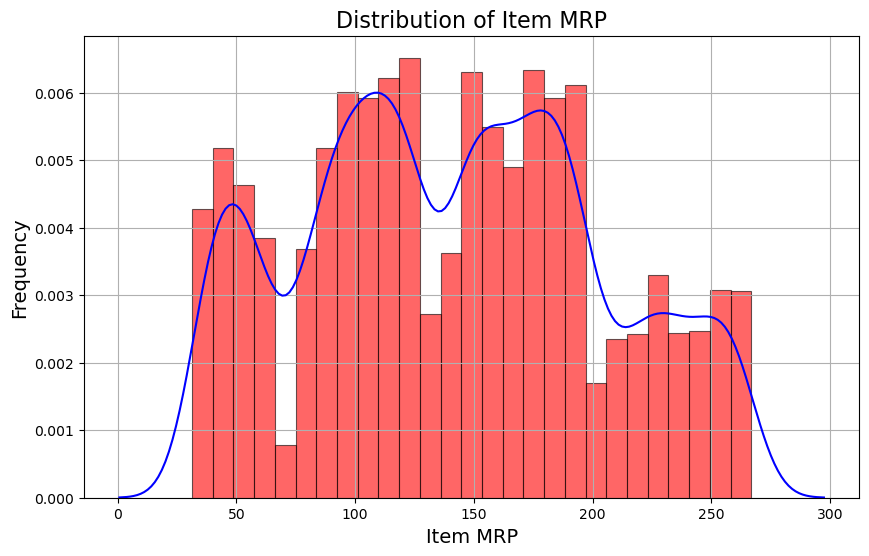

In [242]:
plt.figure(figsize=(10,6))
sns.distplot(df['Item_MRP'], kde=True, color='blue',hist_kws={'alpha': 0.6, 'color': 'red','linewidth': 0.8,'edgecolor': 'black'})
plt.xlabel('Item MRP', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Item MRP', fontsize=16)
plt.grid()
plt.show()

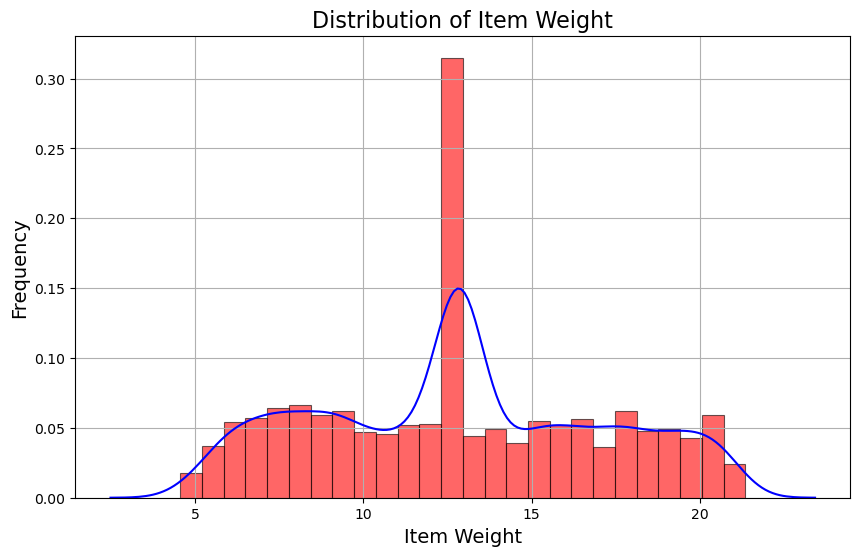

In [243]:
plt.figure(figsize=(10,6))
sns.distplot(df['Item_Weight'], kde=True, color='blue',hist_kws={'alpha': 0.6, 'color': 'red','linewidth': 0.8,'edgecolor': 'black'})
plt.xlabel('Item Weight', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Item Weight', fontsize=16)
plt.grid()
plt.show()

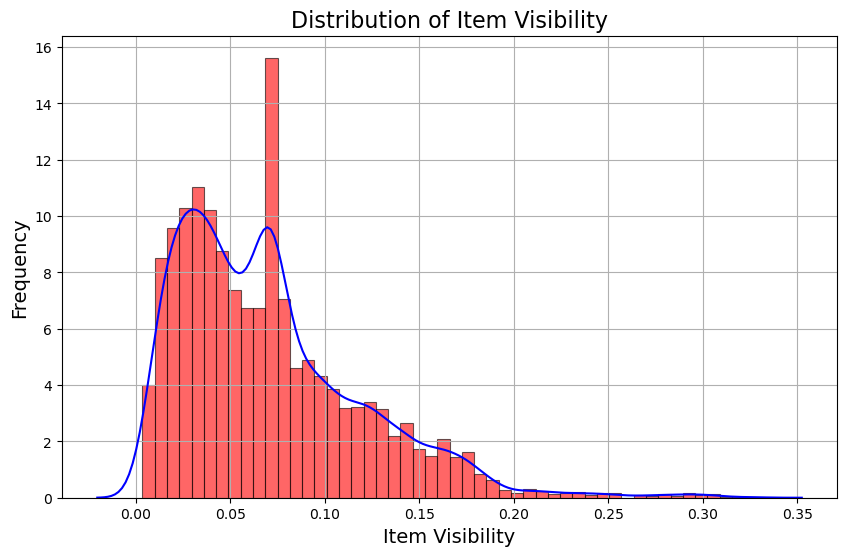

In [244]:
plt.figure(figsize=(10,6))
sns.distplot(df['Item_Visibility'], kde=True, color='blue',hist_kws={'alpha': 0.6, 'color': 'red','linewidth': 0.8,'edgecolor': 'black'})
plt.xlabel('Item Visibility', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Item Visibility', fontsize=16)
plt.grid()
plt.show()

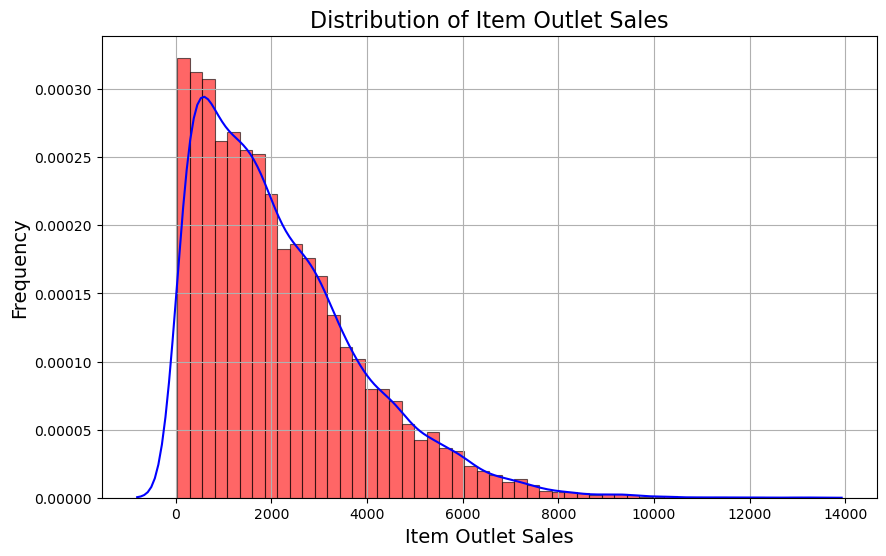

In [245]:
plt.figure(figsize=(10,6))
sns.distplot(df['Item_Outlet_Sales'], kde=True, color='blue',hist_kws={'alpha': 0.6, 'color': 'red','linewidth': 0.8,'edgecolor': 'black'})
plt.xlabel('Item Outlet Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Item Outlet Sales', fontsize=16)
plt.grid()
plt.show()

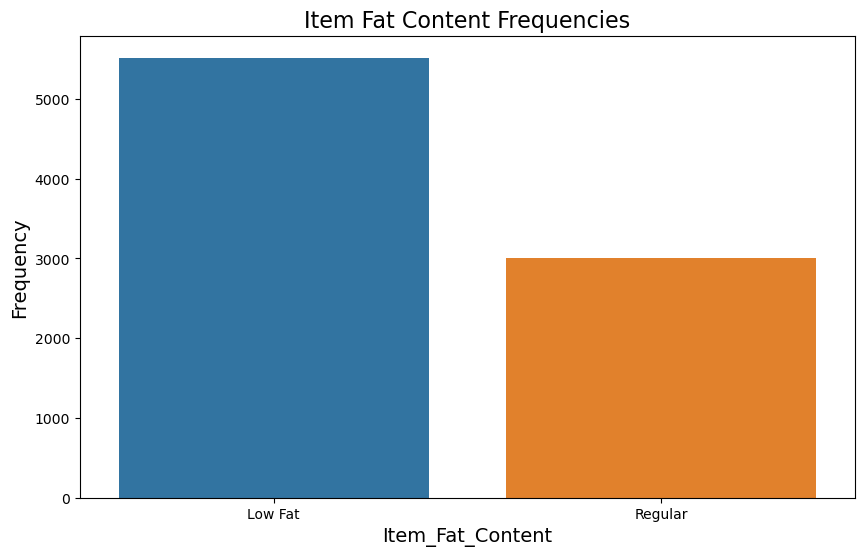

In [246]:
plt.figure(figsize=(10,6))
sns.countplot(x='Item_Fat_Content',data=df)
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Item Fat Content Frequencies', fontsize=16)

plt.show()

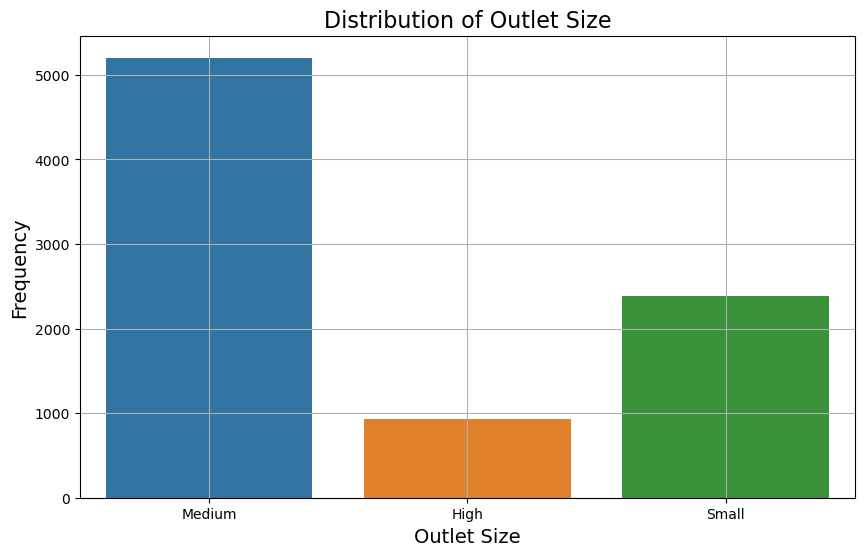

In [247]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Size',data=df)
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Outlet Size', fontsize=16)
plt.grid()
plt.show()

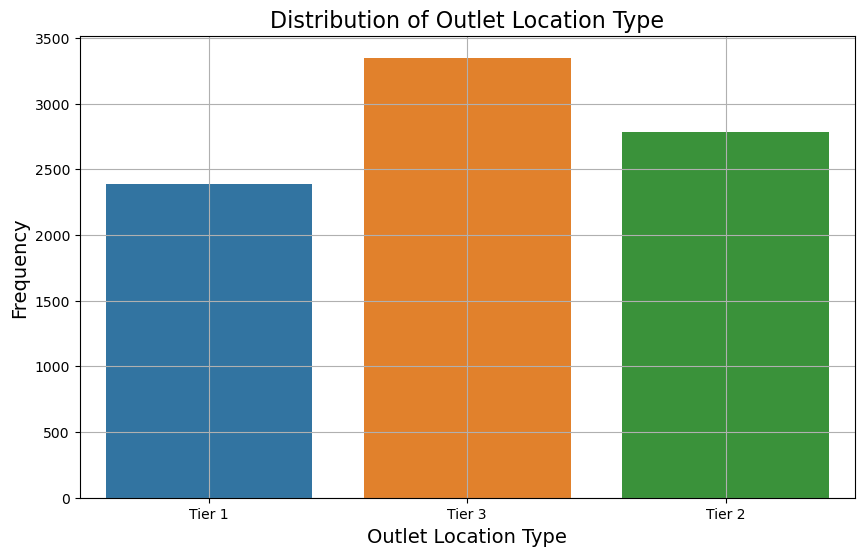

In [248]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Location_Type',data=df)
plt.xlabel('Outlet Location Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Outlet Location Type', fontsize=16)
plt.grid()
plt.show()

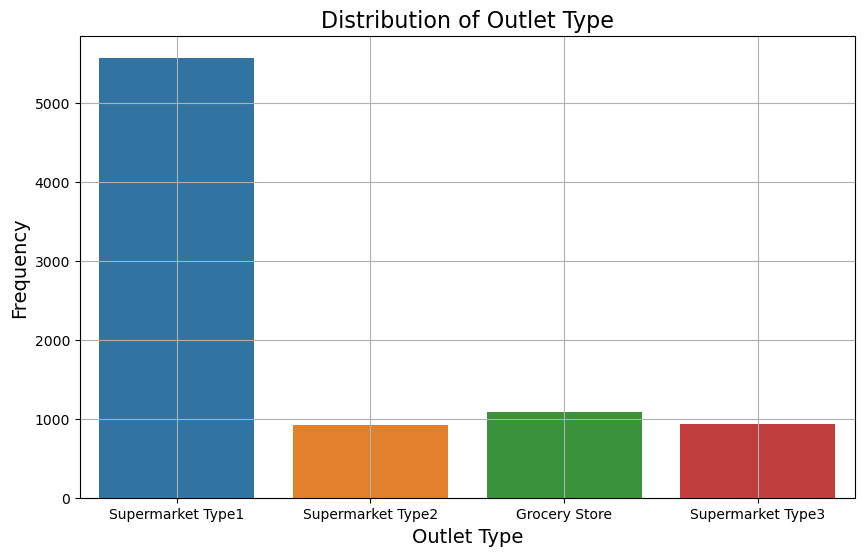

In [249]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type',data=df)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Outlet Type', fontsize=16)
plt.grid()
plt.show()

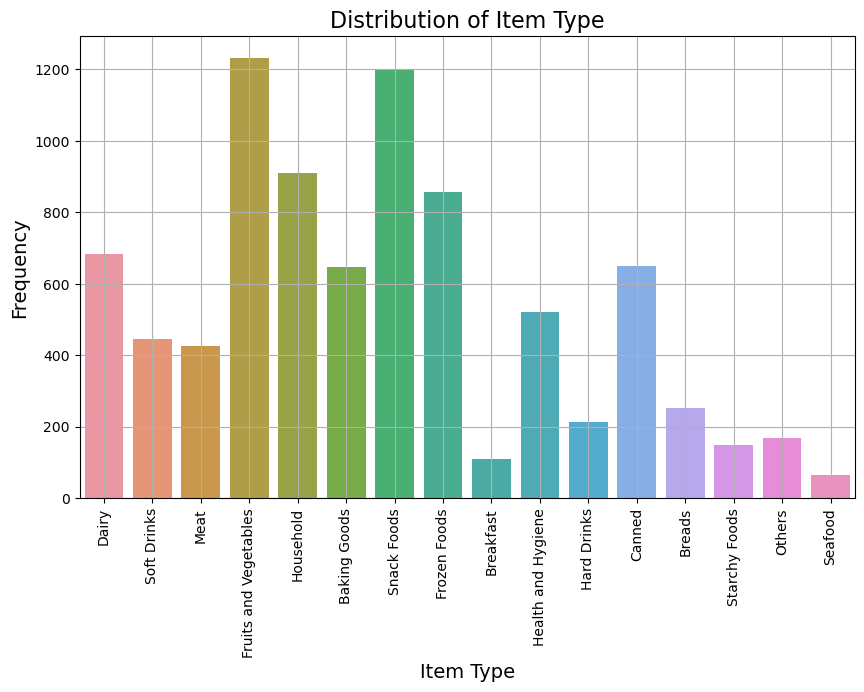

In [250]:
plt.figure(figsize=(10,6))
sns.countplot(x='Item_Type',data=df)
plt.xlabel('Item Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Item Type', fontsize=16)
plt.grid()
plt.xticks(rotation=90)
plt.show()

# Bivarient Analysis

In [251]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet age', 'item_type_combined'],
      dtype='object')

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet age                 8523 non-null   int64  
 13  item_type_combined         8523 non-null   objec

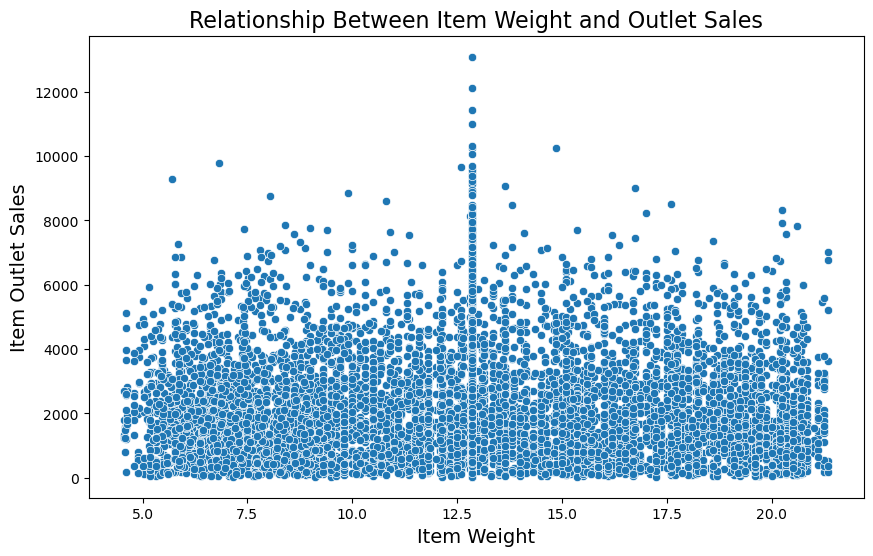

In [253]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df)
plt.xlabel("Item Weight", fontsize=14)
plt.ylabel("Item Outlet Sales", fontsize=14)
plt.title("Relationship Between Item Weight and Outlet Sales", fontsize=16)  # Updated title
plt.show()

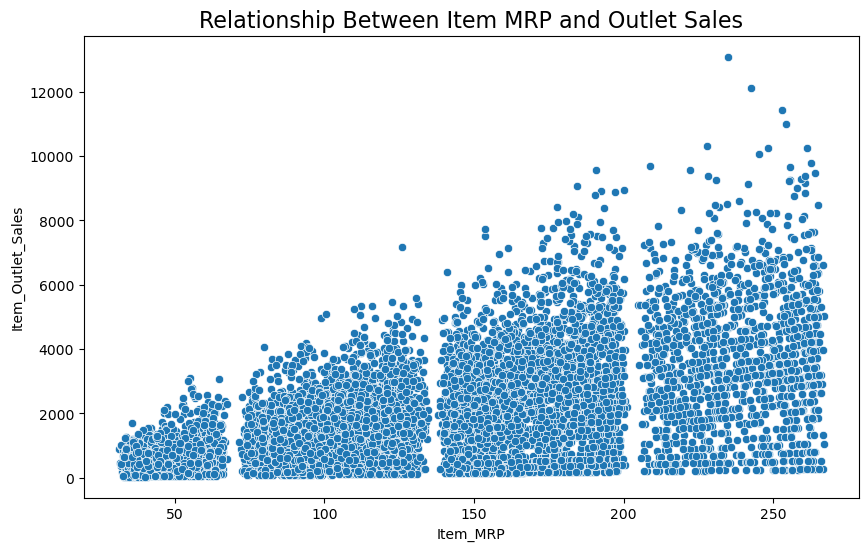

In [254]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Relationship Between Item MRP and Outlet Sales", fontsize=16) 
plt.show()

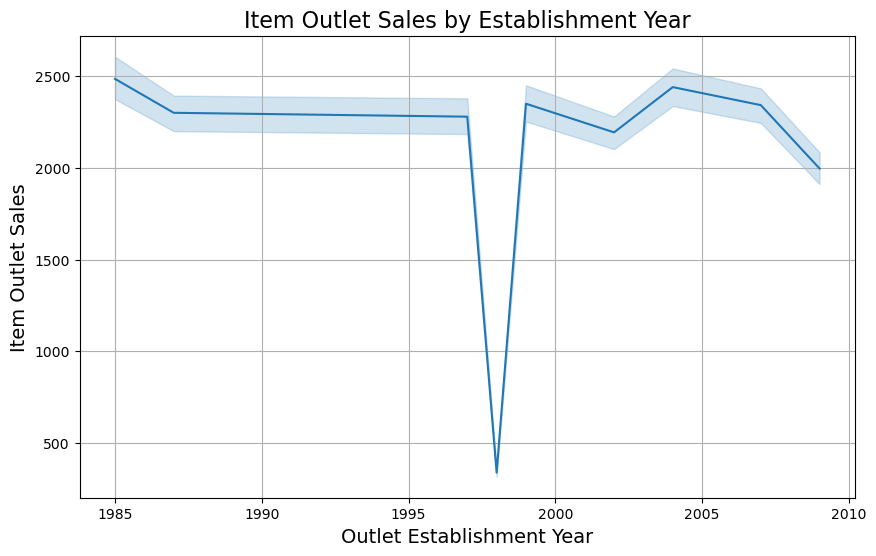

In [255]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)
plt.xlabel('Outlet Establishment Year', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)
plt.title('Item Outlet Sales by Establishment Year', fontsize=16)
plt.grid()
plt.show()

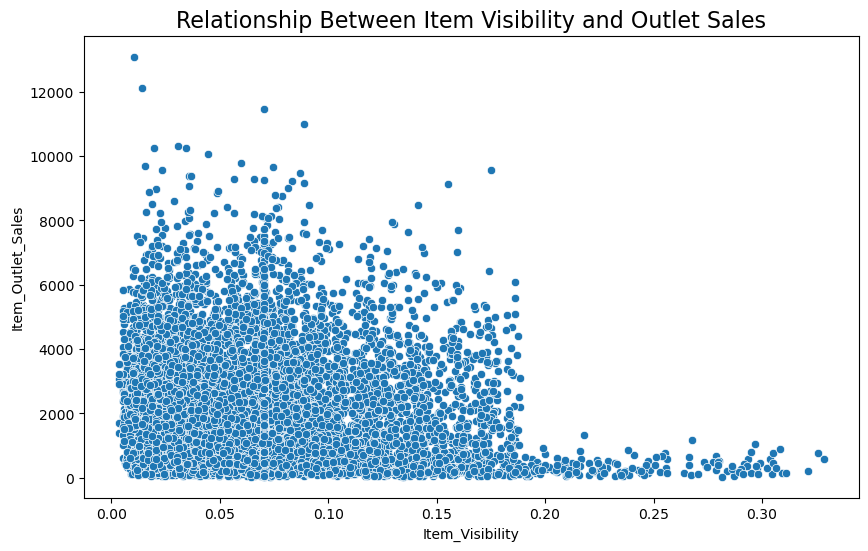

In [256]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title('Relationship Between Item Visibility and Outlet Sales', fontsize=16)
plt.show()

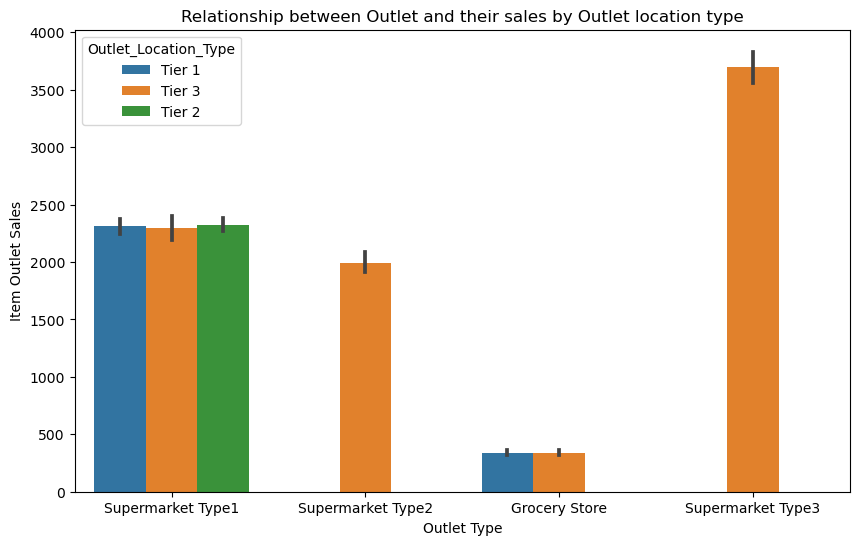

In [257]:
plt.figure(figsize=(10,6))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue="Outlet_Location_Type",data=df)
plt.xlabel("Outlet Type")
plt.ylabel("Item Outlet Sales")
plt.title("Relationship between Outlet and their sales by Outlet location type")
plt.show()

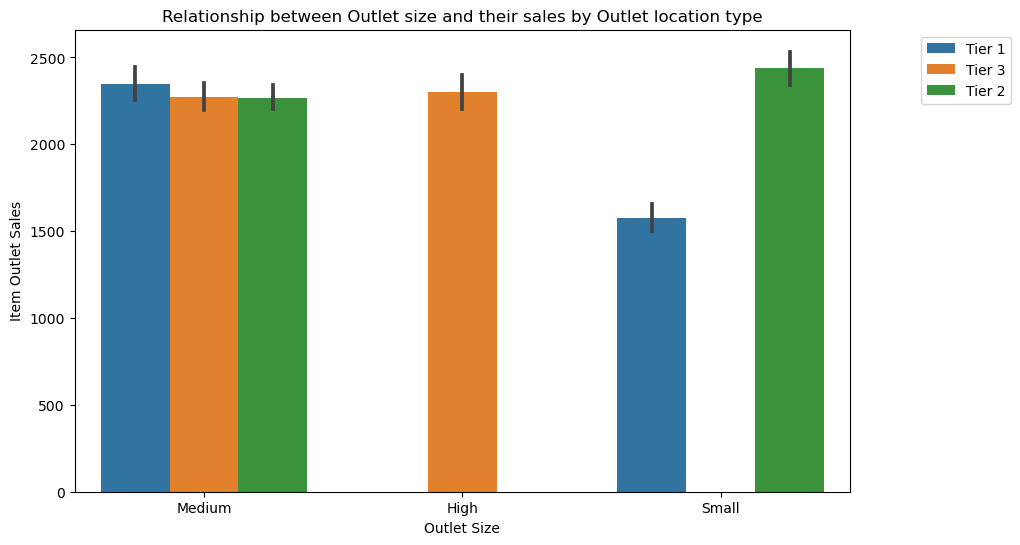

In [258]:
plt.figure(figsize=(10,6))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',hue="Outlet_Location_Type",data=df)
plt.xlabel("Outlet Size")
plt.ylabel("Item Outlet Sales")
plt.title("Relationship between Outlet size and their sales by Outlet location type")
plt.legend(loc="upper center",bbox_to_anchor=(1.15, 1))
plt.show()

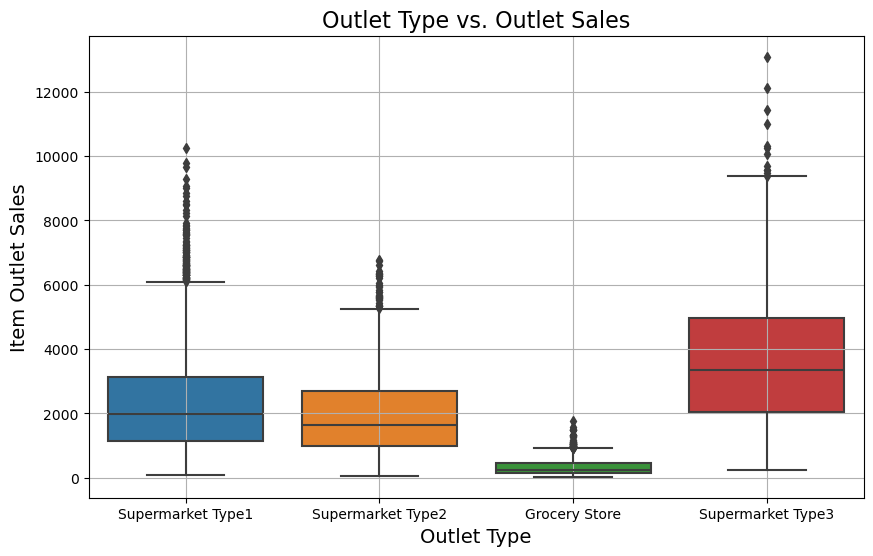

In [259]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.xlabel("Outlet Type", fontsize=14)
plt.ylabel("Item Outlet Sales", fontsize=14)
plt.title("Outlet Type vs. Outlet Sales", fontsize=16)
plt.grid()
plt.show()

In [260]:
#drop unnecessary columns
df.drop(["Item_Identifier","Outlet_Identifier","Item_Type","Outlet_Establishment_Year"],inplace=True,axis=1)

In [261]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet age,item_type_combined
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14,FOOD
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14,FOOD
3,19.20,Regular,0.070482,182.0950,Medium,Tier 3,Grocery Store,732.3800,15,FOOD
4,8.93,Low Fat,0.070482,53.8614,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


<Axes: >

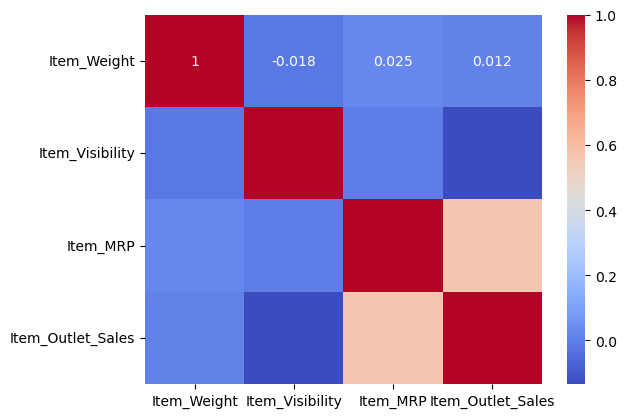

In [327]:
num_cols = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']]
corr = num_cols.corr()
sns.heatmap(corr, annot=True,cmap="coolwarm")

In [115]:
pip install ydata-profiling

     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     --- ------------------------------------ 10.2/107.3 kB ? eta -:--:--
     ---------- -------------------------- 30.7/107.3 kB 325.1 kB/s eta 0:00:01
     ---------- -------------------------- 30.7/107.3 kB 325.1 kB/s eta 0:00:01
     -------------- ---------------------- 41.0/107.3 kB 178.6 kB/s eta 0:00:01
     -------------- ---------------------- 41.0/107.3 kB 178.6 kB/s eta 0:00:01
     --------------------- --------------- 61.4/107.3 kB 192.5 kB/s eta 0:00:01
     --------------------- --------------- 61.4/107.3 kB 192.5 kB/s eta 0:00:01
     --------------------- --------------- 61.4/107.3 kB 192.5 kB/s eta 0:00:01
     ---------------------------- -------- 81.9/107.3 kB 169.9 kB/s eta 0:

  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software



# **Label Encoding**

In [263]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet age,item_type_combined
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14,FOOD
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14,FOOD
3,19.20,Regular,0.070482,182.0950,Medium,Tier 3,Grocery Store,732.3800,15,FOOD
4,8.93,Low Fat,0.070482,53.8614,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


In [264]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [265]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet age,item_type_combined
0,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14,FOOD
1,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14,FOOD
3,19.200,Regular,0.070482,182.0950,Medium,Tier 3,Grocery Store,732.3800,15,FOOD
4,8.930,Low Fat,0.070482,53.8614,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,26,FOOD
8519,8.380,Regular,0.046982,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,11,FOOD
8520,10.600,Low Fat,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,9,Non-Consumable
8521,7.210,Regular,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,4,FOOD


In [266]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["Item_Fat_Content"]=label.fit_transform(df["Item_Fat_Content"])
df["Outlet_Size"]=label.fit_transform(df["Outlet_Size"])
df["Outlet_Location_Type"]=label.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Type"]=label.fit_transform(df["Outlet_Type"])
df["item_type_combined"]=label.fit_transform(df["Outlet_Type"])

In [267]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet age,item_type_combined
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,14,1
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,4,2
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,14,1
3,19.20,1,0.070482,182.0950,1,2,0,732.3800,15,0
4,8.93,0,0.070482,53.8614,0,2,1,994.7052,26,1


In [268]:
df["Outlet_Size"].unique()

array([1, 0, 2])

In [269]:
df["Outlet_Location_Type"].unique()

array([0, 2, 1])

In [270]:
df["item_type_combined"].unique()

array([1, 2, 0, 3], dtype=int64)

In [271]:
df["Outlet_Type"].unique()

array([1, 2, 0, 3])

In [272]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet age,item_type_combined
0,9.300,0,0.016047,249.8092,1,0,1,3735.1380,14,1
1,5.920,1,0.019278,48.2692,1,2,2,443.4228,4,2
2,17.500,0,0.016760,141.6180,1,0,1,2097.2700,14,1
3,19.200,1,0.070482,182.0950,1,2,0,732.3800,15,0
4,8.930,0,0.070482,53.8614,0,2,1,994.7052,26,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,1,2778.3834,26,1
8519,8.380,1,0.046982,108.1570,1,1,1,549.2850,11,1
8520,10.600,0,0.035186,85.1224,2,1,1,1193.1136,9,1
8521,7.210,1,0.145221,103.1332,1,2,2,1845.5976,4,2


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int32  
 2   Item_Visibility       8523 non-null   float64
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Size           8523 non-null   int32  
 5   Outlet_Location_Type  8523 non-null   int32  
 6   Outlet_Type           8523 non-null   int32  
 7   Item_Outlet_Sales     8523 non-null   float64
 8   Outlet age            8523 non-null   int64  
 9   item_type_combined    8523 non-null   int64  
dtypes: float64(4), int32(4), int64(2)
memory usage: 532.8 KB


In [274]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet age,item_type_combined
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,14,1
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,4,2
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,14,1
3,19.20,1,0.070482,182.0950,1,2,0,732.3800,15,0
4,8.93,0,0.070482,53.8614,0,2,1,994.7052,26,1


In [275]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet age', 'item_type_combined'],
      dtype='object')

# **train_test_split**

In [276]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

In [277]:
X.shape

(8523, 9)

In [278]:
y.shape

(8523,)

In [279]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100)

In [280]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6392, 9), (2131, 9), (6392,), (2131,))

# **Model Building**

In [283]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler,StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Standard Scaling and Robust Scaling

In [285]:
# Apply Standard Scaling
standard_Scaler=StandardScaler()
X_train_standard_scaled = standard_Scaler.fit_transform(X_train)
X_test_standard_scaled = standard_Scaler.transform(X_test)

In [287]:
# Apply Robust Scaling
Robust_Scaler=RobustScaler()
X_train_robust_scaled = Robust_Scaler.fit_transform(X_train)
X_test_robust_scaled = Robust_Scaler.transform(X_test)

# Train models and perform hyperparameter tuning using GridSearchCV

In [288]:
# Define the parameter grid for XGBRegressor
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [289]:
# Initialize the XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [290]:
# Initialize GridSearchCV for XGBRegressor
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, 
                               cv=3, scoring='r2', verbose=1, n_jobs=-1)

In [291]:
xgb_grid_search.fit(X_train_standard_scaled, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=1)

In [292]:
print("XGBoost (Standard Scaling) Best parameters found: ", xgb_grid_search.best_params_)
print("XGBoost (Standard Scaling) Best R^2 score: ", xgb_grid_search.best_score_)

XGBoost (Standard Scaling) Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
XGBoost (Standard Scaling) Best R^2 score:  0.6015949516298353


# Gradient Boosting Regressor with Robust Scaling

In [294]:
gbr_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_grid_search = GridSearchCV(estimator=gbr_model, param_grid=gbr_param_grid, 
                               cv=3, scoring='r2', verbose=1, n_jobs=-1)

gbr_grid_search.fit(X_train_robust_scaled, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=1)

In [295]:
print("GradientBoosting (Robust Scaling) Best parameters found: ", gbr_grid_search.best_params_)
print("GradientBoosting (Robust Scaling) Best R^2 score: ", gbr_grid_search.best_score_)

GradientBoosting (Robust Scaling) Best parameters found:  {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50, 'subsample': 1.0}
GradientBoosting (Robust Scaling) Best R^2 score:  0.5991583863712


# Evaluate the models                                                           

In [296]:
# Evaluate the best XGBoost model with Standard Scaling
best_xgb_model = xgb_grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_standard_scaled)

xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost (Standard Scaling) Mean Squared Error: {xgb_mse}")
print(f"XGBoost (Standard Scaling) R^2 Score: {xgb_r2}")

XGBoost (Standard Scaling) Mean Squared Error: 1169371.2802136978
XGBoost (Standard Scaling) R^2 Score: 0.59210277095087


In [297]:
# Evaluate the best GradientBoosting model with Robust Scaling
best_gbr_model = gbr_grid_search.best_estimator_
y_pred_gbr = best_gbr_model.predict(X_test_robust_scaled)

gbr_mse = mean_squared_error(y_test, y_pred_gbr)
gbr_r2 = r2_score(y_test, y_pred_gbr)

print(f"GradientBoosting (Robust Scaling) Mean Squared Error: {gbr_mse}")
print(f"GradientBoosting (Robust Scaling) R^2 Score: {gbr_r2}")

GradientBoosting (Robust Scaling) Mean Squared Error: 1180389.3863999515
GradientBoosting (Robust Scaling) R^2 Score: 0.5882594621072317


# Save the model using pickle

In [325]:
import pickle
#Save the best XGBRegressor model using pickle
with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)

In [326]:
# Save the best GradientBoostingRegressor model using pickle
with open('best_gbr_model.pkl', 'wb') as f:
    pickle.dump(best_gbr_model, f)

# **Model summary**

In [331]:
# Feature importances
feature_importances_xgb = best_xgb_model.feature_importances_
feature_names = X.columns
feature_importance_df_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_xgb})
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Get the best parameters and score
best_xgb_params = xgb_grid_search.best_params_
best_xgb_score = xgb_grid_search.best_score_

# XGBoost Summary
print("XGBoost Model Summary:")
print("======================")
print(f"Best Parameters: {best_xgb_params}")
print(f"Best Cross-validation R^2 Score: {best_xgb_score}")
print(f"Test Set Mean Squared Error: {xgb_mse}")
print(f"Test Set R^2 Score: {xgb_r2}")
print("\nFeature Importances:")
print(feature_importance_df_xgb)

XGBoost Model Summary:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-validation R^2 Score: 0.6015949516298353
Test Set Mean Squared Error: 1169371.2802136978
Test Set R^2 Score: 0.59210277095087

Feature Importances:
                Feature  Importance
6           Outlet_Type    0.459560
3              Item_MRP    0.418688
7            Outlet age    0.032702
5  Outlet_Location_Type    0.030375
2       Item_Visibility    0.018147
4           Outlet_Size    0.015010
0           Item_Weight    0.014393
1      Item_Fat_Content    0.011125
8    item_type_combined    0.000000


In [332]:
# Get the best parameters and score
best_gbr_params = gbr_grid_search.best_params_
best_gbr_score = gbr_grid_search.best_score_

# Feature importances
feature_importances_gbr = best_gbr_model.feature_importances_
feature_importance_df_gbr = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_gbr})
feature_importance_df_gbr = feature_importance_df_gbr.sort_values(by='Importance', ascending=False)

# GradientBoostingRegressor Summary
print("\nGradient Boosting Model Summary:")
print("================================")
print(f"Best Parameters: {best_gbr_params}")
print(f"Best Cross-validation R^2 Score: {best_gbr_score}")
print(f"Test Set Mean Squared Error: {gbr_mse}")
print(f"Test Set R^2 Score: {gbr_r2}")
print("\nFeature Importances:")
print(feature_importance_df_gbr)


Gradient Boosting Model Summary:
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50, 'subsample': 1.0}
Best Cross-validation R^2 Score: 0.5991583863712
Test Set Mean Squared Error: 1180389.3863999515
Test Set R^2 Score: 0.5882594621072317

Feature Importances:
                Feature  Importance
3              Item_MRP    0.569525
6           Outlet_Type    0.190272
8    item_type_combined    0.181383
7            Outlet age    0.036216
0           Item_Weight    0.010732
2       Item_Visibility    0.009474
1      Item_Fat_Content    0.001034
4           Outlet_Size    0.000708
5  Outlet_Location_Type    0.000655


# Make final predictions on the test dataset

In [300]:
test_df=pd.read_csv("test.csv")

In [301]:
test_df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [303]:
test_df["Item_Type"].value_counts()

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64

# Data preprocessing and data handling on test data

In [304]:
# Replace missing values in Item_Weight with the mean
test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(), inplace=True)

# Replace missing values in Outlet_Size with the mode
test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0], inplace=True)

In [305]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [306]:
test_df['Outlet age']=2013-test_df['Outlet_Establishment_Year']

In [307]:
test_df['item_type_combined']=test_df['Item_Identifier'].apply(lambda x:x[0:2])

In [308]:
test_df['item_type_combined']=test_df['item_type_combined'].map({"FD":"FOOD","NC":"Non-Consumable","DR":"Drinks"})

In [309]:
mean_visibility = test_df.loc[test_df['Item_Visibility'] > 0, 'Item_Visibility'].mean()
test_df['Item_Visibility'] = test_df['Item_Visibility'].replace(0, mean_visibility)

In [310]:
test_df['Item_Fat_Content']=test_df['Item_Fat_Content'].replace({
    'LF':'Low Fat',
    'low fat':'Low Fat',
    'reg':'Regular'
})

In [311]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet age,item_type_combined
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14,FOOD
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,6,FOOD
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,15,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,6,FOOD
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,FOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,16,FOOD
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,4,FOOD
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,11,Non-Consumable
5679,FDJ26,15.300000,Regular,0.070036,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,6,FOOD


In [312]:
test_df["Item_Fat_Content"]=label.fit_transform(test_df["Item_Fat_Content"])
test_df["Outlet_Size"]=label.fit_transform(test_df["Outlet_Size"])
test_df["Outlet_Location_Type"]=label.fit_transform(test_df["Outlet_Location_Type"])
test_df["Outlet_Type"]=label.fit_transform(test_df["Outlet_Type"])
test_df["item_type_combined"]=label.fit_transform(test_df["Outlet_Type"])

In [313]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet age,item_type_combined
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1,14,1
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,1,1,1,6,1
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,1,2,0,15,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,1,6,1
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,3,28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,1,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,1,16,1
5677,FDD47,7.600000,1,0.142991,Starchy Foods,169.1448,OUT018,2009,1,2,2,4,2
5678,NCO17,10.000000,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,1,1,11,1
5679,FDJ26,15.300000,1,0.070036,Canned,214.6218,OUT017,2007,1,1,1,6,1


In [314]:
test_df.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Type','Outlet_Identifier'],axis=1,inplace=True)

In [315]:
test_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet age,item_type_combined
0,20.750000,0,0.007565,107.8622,1,0,1,14,1
1,8.300000,1,0.038428,87.3198,1,1,1,6,1
2,14.600000,0,0.099575,241.7538,1,2,0,15,0
3,7.315000,0,0.015388,155.0340,1,1,1,6,1
4,12.695633,1,0.118599,234.2300,1,2,3,28,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,141.3154,2,0,1,16,1
5677,7.600000,1,0.142991,169.1448,1,2,2,4,2
5678,10.000000,0,0.073529,118.7440,1,1,1,11,1
5679,15.300000,1,0.070036,214.6218,1,1,1,6,1


In [316]:
X_test_final_standard_scaled = standard_Scaler.transform(test_df)
X_test_final_robust_scaled = Robust_Scaler.transform(test_df)

In [317]:
final_predictions_xgb = best_xgb_model.predict(X_test_final_standard_scaled)
final_predictions_gbr = best_gbr_model.predict(X_test_final_robust_scaled)


In [318]:
pd.DataFrame(final_predictions_xgb, columns=['XGB_Predictions']).to_csv('xgb_final_predictions.csv', index=False)
pd.DataFrame(final_predictions_gbr, columns=['GBR_Predictions']).to_csv('gbr_final_predictions.csv', index=False)

In [319]:
xgb=pd.read_csv("xgb_final_predictions.csv")
xgb

,XGB_Predictions
0,1669.7330
1,1377.3442
2,603.9732
3,2524.5520
4,6025.3447
...,...
5676,2169.1330
5677,2521.9340
5678,1948.2822
5679,3433.9756


In [321]:
gbr=pd.read_csv("gbr_final_predictions.csv")
gbr

,GBR_Predictions
0,1558.856332
1,1347.022205
2,695.651780
3,2551.146325
4,5905.993570
...,...
5676,2198.231792
5677,2489.256432
5678,1886.884269
5679,3553.716131
